# Lab 02: Basic image processing

The purpose of this lab is to introduce programs from FSL and AFNI for doing math on images in space and/or time. We will also learn how to summarize information you extract from an image into variables that you can then plot to help understand what just happened to the image.

## Preparation 
* import python tools for plotting
* learn how to make common plots of timeseries data and images that will be helpful later

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nilearn import plotting
from nilearn import image

In [2]:
%matplotlib inline

### Plot a timeseries

Text(0,0.5,'ylabel')

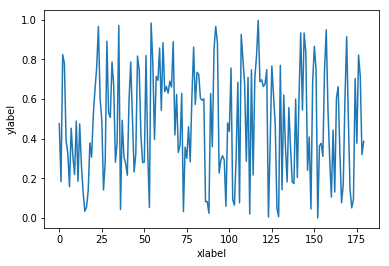

In [33]:
# the np below refers to the numpy toolbox we imported above and renamed to np
random_timeseries = np.random.rand(180,1)  # fill matrix with numbers, 180 cols by 1 row
# plt refers to the plt matplotlib toolbox we imported above and renamed to plt
plt.plot(random_timeseries) # plot the variable
plt.xlabel('xlabel')
plt.ylabel('ylabel')

In [136]:
# how to get help on a python command
plt.plot?

### Example: a plot of the two timeseries we've made with a legend and x- and y- axes labeled as time and intensity respectively

Text(0,0.5,'intensity')

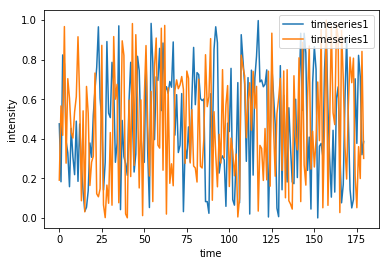

In [35]:
# Answer
plt.plot(random_timeseries,label='timeseries1') # plot the variable
plt.plot(random_timeseries2,label='timeseries1') # plot the variable
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('intensity')

### Plot an image

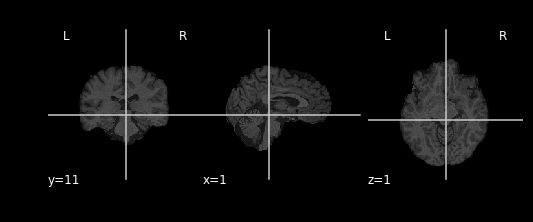

In [41]:
# plot an image to view:
# img="condA_pre_gt_post_4D_m_susan_tstat1_thrp.99_neg.nii.gz"
img="../01-Lab/osfshare/sub-97-T1w_brain.nii.gz"
# plot just the image...
display=plotting.plot_anat(img, display_mode="ortho")
# learn about this plotting tool here:
# http://nilearn.github.io/modules/generated/nilearn.plotting.plot_anat.html#nilearn.plotting.plot_anat

### Plot an anatomical image with a "mask" over top

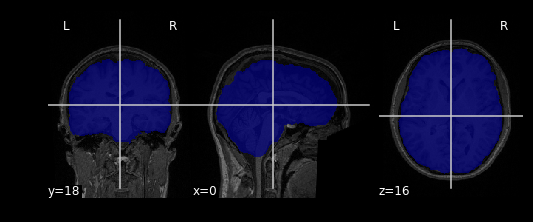

In [51]:
img_wskull="../01-Lab/osfshare/sub-97-T1w_defaced.nii.gz"
img_mask="../01-Lab/osfshare/sub-97-T1w_brain_mask.nii.gz"
display=plotting.plot_roi(img_mask,img_wskull, display_mode="ortho")

### <font color=green> Practice: </font>
    * Use FSLview to find a coordinate in the right prefrontal cortex for the T1 and functional image, and then plot the images below with the cross-hair centered at the coordinate of interest. 
    * Another common plot of interest is to specify a row of axial images.  

In [48]:
# Your code here...

## Introducing utilities to do math on images
<br>
Today we'll get a feel for the programs in FSL that allow you to easily do math on images. Below are common mathematical operations that are done to images during image quality description and preprocessing:
* Thresholding
* Extract values with a mask
* Plot values extracted from an image in jupyter

### fslmaths

In [52]:
%%bash
fslmaths


Usage: fslmaths [-dt <datatype>] <first_input> [operations and inputs] <output> [-odt <datatype>]

Datatype information:
 -dt sets the datatype used internally for calculations (default float for all except double images)
 -odt sets the output datatype ( default is float )
 Possible datatypes are: char short int float double input
 "input" will set the datatype to that of the original image

Binary operations:
  (some inputs can be either an image or a number)
 -add   : add following input to current image
 -sub   : subtract following input from current image
 -mul   : multiply current image by following input
 -div   : divide current image by following input
 -rem   : modulus remainder - divide current image by following input and take remainder
 -mas   : use (following image>0) to mask current image
 -thr   : use following number to threshold current image (zero anything below the number)
 -thrp  : use following percentage (0-100) of ROBUST RANGE to threshold current image (zero any

### Use fslmaths to "mask" an image

In [54]:
%%bash
# Multiply our mask with our skulled image
fslmaths ../01-Lab/osfshare/sub-97-T1w_defaced.nii.gz -mul ../01-Lab/osfshare/sub-97-T1w_brain_mask.nii.gz ../01-Lab/osfshare/sub-97-T1w_masked.nii.gz

In [137]:
%%bash
# View them all together in fslview
fslview ../01-Lab/osfshare/sub-97-T1w_defaced.nii.gz ../01-Lab/osfshare/sub-97-T1w_brain_mask.nii.gz ../01-Lab/osfshare/sub-97-T1w_masked.nii.gz &

### <font color=green> Practice: </font> 
What if we want to make an image of them overlayed to put in the notebook for easy sharing with collaborator or advisor? Try plotting tools above to do the same thing in line.

In [138]:
# use python plotting tools


### fslstats

In [53]:
%%bash
fslstats 

Usage: fslstats [preoptions] <input> [options]

preoption -t will give a separate output line for each 3D volume of a 4D timeseries
preoption -K < indexMask > will generate seperate n submasks from indexMask, for indexvalues 1..n where n is the maximum index value in indexMask, and generate statistics for each submask
Note - options are applied in order, e.g. -M -l 10 -M will report the non-zero mean, apply a threshold and then report the new nonzero mean

-l <lthresh> : set lower threshold
-u <uthresh> : set upper threshold
-r           : output <robust min intensity> <robust max intensity>
-R           : output <min intensity> <max intensity>
-e           : output mean entropy ; mean(-i*ln(i))
-E           : output mean entropy (of nonzero voxels)
-v           : output <voxels> <volume>
-V           : output <voxels> <volume> (for nonzero voxels)
-m           : output mean
-M           : output mean (for nonzero voxels)
-s           : output standard deviation
-S           : output s

### use fslstats to get summary statistics in your image within a mask

In [62]:
%%bash
# Let's pull out the mean intensity of our structural image within our mask
# fslstats with no mask
# Reads: with this image, take mean of non-zero voxels
fslstats ../01-Lab/osfshare/sub-97-T1w_defaced.nii.gz -M

98.248448 


In [65]:
%%bash
# fslstats with mask
# Reads: with this image, apply mask, then take mean of non-zero voxels
fslstats ../01-Lab/osfshare/sub-97-T1w_defaced.nii.gz -k ../01-Lab/osfshare/sub-97-T1w_brain_mask.nii.gz -M

261.659212 


### <font color = green> Practice: </font> 
Make a mask on the functional image using fslmaths commands

In [104]:
%%bash
# Hint, first make an image that is the mean of all the functional volumes
# Your code here...
# Examples
fslmaths ../01-Lab/osfshare/sub-97_task-flanker_bold.nii.gz -Tmean sub-97_task-flanker_bold_mean.nii.gz
fslmaths ../01-Lab/osfshare/sub-97_task-flanker_bold.nii.gz -Tmean -thrP 90 sub-97_task-flanker_bold_mean_top10.nii.gz

In [106]:
%%bash
# Binarising the mask after thresholding:
fslmaths sub-97_task-flanker_bold_mean_top10.nii.gz -bin sub-97_task-flanker_bold_mean_top10_bin.nii.gz

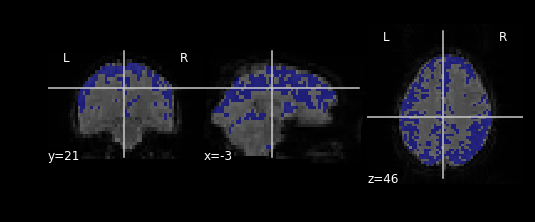

In [107]:
# View your mask on the mean functional
# Student copy will have file names as template variables
fmask="sub-97_task-flanker_bold_mean_top10_bin.nii.gz"
fmean="sub-97_task-flanker_bold_mean.nii.gz"
display=plotting.plot_roi(fmask,fmean, display_mode="ortho")

### <font color=green> Practice: Make a mask on the functional image using the fslview GUI </font> 

Steps: 
* Open your base image for the mask in FSLview
* File menu: File> Create Mask
* GUI toolbar: Select pencil to activate mask tools
* GUI toolbar: Set pencil width to 5 and value to 1
* Draw your mask on contiguous axial slices
* When done, File menu: Save as..

In [103]:
%%bash
fslview &

### Extract a timeseries using fslmeants and plot it

In [100]:
%%bash
fslmeants

***************************************************
The following COMPULSORY options have not been set:
	-i <filename>	input 4D image
***************************************************

Part of FSL (build 509)
fslmeants 
Copyright(c) 2004-2009, University of Oxford (Mark Jenkinson, Christian F. Beckmann)
Prints average timeseries (intensities) to the screen (or saves to a file).
The average is taken over all voxels in the mask (or all voxels in the image if no mask is specified).


Usage: 
fslmeants -i filtered_func_data -o meants.txt -m my_mask
fslmeants -i filtered_func_data -m my_mask
fslmeants -i filtered_func_data -c 24 19 10

Compulsory arguments (You MUST set one or more of):
	-i <filename>	input 4D image

Optional arguments (You may optionally specify one or more of):
	-o <filename>	output text matrix
	-m <filename>	input 3D mask
	-c <x y z>	requested spatial coordinate (instead of mask)
	--usemm		use mm instead of voxel coordinates (for -c option)
	--showall	show all voxel ti

In [110]:
%%bash
fslmeants -i ../01-Lab/osfshare/sub-97_task-flanker_bold.nii.gz -o top10_meants.txt -m sub-97_task-flanker_bold_mean_top10.nii.gz 

In [111]:
%%bash
ls

ImageProcessingBasics.ipynb
img
sub-97_task-flanker_bold_mean.nii.gz
sub-97_task-flanker_bold_mean_top10_bin.nii.gz
sub-97_task-flanker_bold_mean_top10.nii.gz
sub-97_task-flanker_bold_mean_top20.nii.gz
sub-97_task-flanker_bold_mean-vismask.nii.gz
top10_meants.txt


Text(0,0.5,'BOLD')

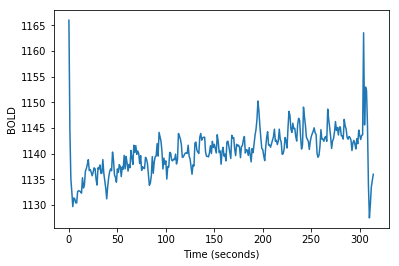

In [139]:
#use the python tools in pandas to load the text file and then we can plot as above
import pandas as pd
##https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html
##load a text file and plot it
df = pd.read_table('top10_meants.txt', header=None)
plt.plot(df) #plot the variable
plt.xlabel('Time (seconds)')
plt.ylabel('BOLD')

Our observations/notes/questions:





## Practice Problems

1) Use fslmaths to make a mask of the regions in the functional image that are in the highest 10% of voxels with regard to their standard deviation. Use the bash cell below to show your code to make the mask, and use the python cell to plot your mask on your mean functional image.  

In [128]:
%%bash
# your code here
fslmaths ../01-Lab/osfshare/sub-97_task-flanker_bold.nii.gz -Tstd -thrP 90 sub-97_task-flanker_bold_std_top10.nii.gz

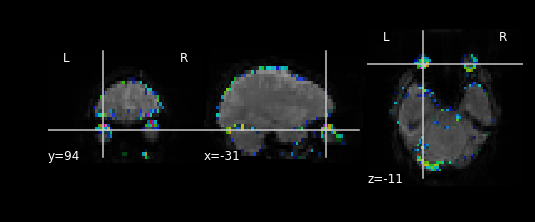

In [127]:
# python code for plotting
smask="sub-97_task-flanker_bold_std_top10.nii.gz"
display=plotting.plot_roi(smask,fmean, display_mode="ortho") 

2) Use FSLview to make an ROI that is outside the brain. Use the python cell to plot your mask on your mean functional image.

In [129]:
%%bash
fslview &

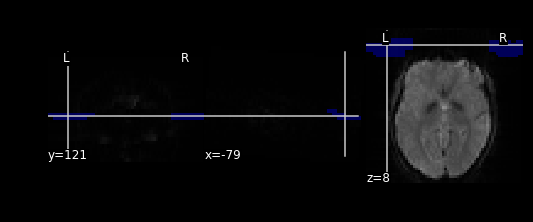

In [131]:
outbrain="sub-97_task-flanker_bold_mean-mask-outbrain.nii.gz"
display=plotting.plot_roi(outbrain,fmean, display_mode="ortho") 

3) Use fslmeants to output the mean timeseries from a mask you've made on the functional image that is inside the brain and outside the brain. Use the plotting tools shown above to plot those timeseries data on the same plot and in separate plots below. Write out two to three observations about their similarities and differences. 

In [133]:
%%bash
# fslmeants command
fslmeants -i ../01-Lab/osfshare/sub-97_task-flanker_bold.nii.gz -o outbrain_meants.txt -m sub-97_task-flanker_bold_mean-mask-outbrain.nii.gz 

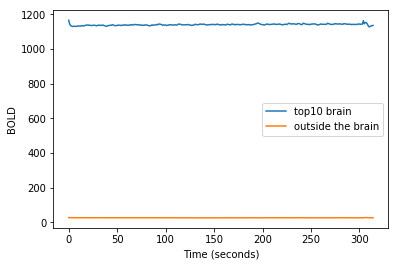

In [144]:
dfout = pd.read_table('outbrain_meants.txt', header=None)
plt.plot(df, label="top10 brain") #plot the variable
plt.plot(dfout, label="outside the brain") #plot the variable
plt.xlabel('Time (seconds)')
plt.ylabel('BOLD')
plt.legend(loc='best')

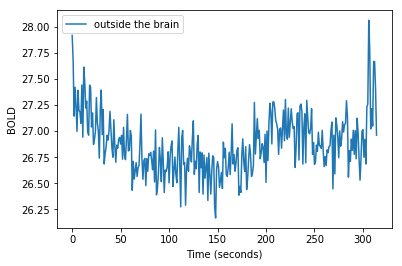

In [145]:
plt.plot(dfout, label="outside the brain") #plot the variable
plt.xlabel('Time (seconds)')
plt.ylabel('BOLD')
plt.legend(loc='best')

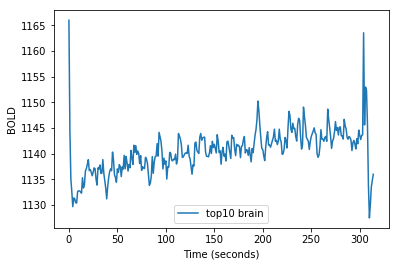

In [146]:
plt.plot(df, label="top10 brain") #plot the variable
plt.xlabel('Time (seconds)')
plt.ylabel('BOLD')
plt.legend(loc='best')